# Análise dos tweets do perfil @jairbolsonaro

#### following tutorials:
* https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

* python liberaries: https://activewizards.com/blog/comparison-of-python-nlp-libraries/

Steps:
* Data imported and checked
* Feature engeneering
* Top words not working (take function from case made to ironhack)

* source: https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

# Defining functions

In [46]:
def rename_cols(df):
    cols = df.columns
    cols = cols.str.replace(' ', '_').str.lower()
    df.columns = cols
    return(df)

In [59]:
import re
def remove_link(col):
    ''' a function for removing urls from a tweet'''
    url_pattern = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    col = re.sub(url_pattern, '', col)
    return(col)

* https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

In [60]:
# remove punctionation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)    

In [64]:
def remove_sw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [99]:
def serie_to_string(col):
    ''' tranform a Pandas Series into a string'''
    string = ''
    for i in col:
        string = string + (" ".join(i.split()))
    return(string)

In [106]:
# global variables
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

# Import and check data

In [49]:
import pandas as pd

In [51]:
# importing xlsx into a pandas dataframe
df = pd.read_excel('Jair_Bolsonaro.xlsx')

# selecting tweets from @jairbolsonaro account
df = df[df['Author name']=='Jair M. Bolsonaro']
df.head(1)

# Select columns
cols = ['id', 'Detail', 'Link', 'Update date', 'Publish date', 'Tags', 'Audience', 'Reach', 'Interactions']
df = df[cols]
df = rename_cols(df)

In [52]:
# check the dataset
print(df.shape)
df.head(1)

(1809, 9)


,id,detail,link,update_date,publish_date,tags,audience,reach,interactions
0,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447


# Feature engineering - data cleaning

In [107]:
# Remove link
df['text'] = df.detail.apply(remove_link)
df.text[0]

'- Resumo de nossa ida a Pelotas/RS por ocasião da entrega de trecho da BR 116.'

In [108]:
# Removing punctuations and stopwords
df['text'] = df.text.apply(remove_punctuation)
df['text'] = df.text.apply(remove_sw)
df.text[0:2]

0    resumo ida pelotasrs ocasião entrega trecho br...
1    parabéns atletas representaram brasil jogos pa...
Name: text, dtype: object

In [110]:
# clear stop words
from nltk.tokenize import word_tokenize
tweets_str = serie_to_string(df.text)

clean_text = [w for w in word_tokenize(tweets_str) 
              if w not in sw]

In [111]:
clean_text

['resumo',
 'ida',
 'pelotasrs',
 'ocasião',
 'entrega',
 'trecho',
 'br',
 '116parabéns',
 'atletas',
 'representaram',
 'brasil',
 'jogos',
 'panamericanos',
 'lima',
 '2019',
 'segundo',
 'lugar',
 'quadro',
 'medalhas',
 '55',
 'ouro',
 '45',
 'prata',
 '71',
 'bronze',
 'melhor',
 'desempenho',
 'história',
 'medalhistas',
 '543',
 'atletas',
 'forças',
 'armadas',
 'br1345',
 'x',
 '76',
 'textobase',
 'medida',
 'provisória',
 'liberdade',
 'econômica',
 'acaba',
 'ser',
 'aprovado',
 'câmara',
 'brasil',
 'dá',
 'passo',
 'importantíssimo',
 'rumo',
 'prosperidade',
 'parabéns',
 'parlamentares',
 'caminho',
 'menos',
 'burocracia',
 'empregosgrande',
 'dia',
 '1rt',
 'damaresalves',
 'tiraram',
 'dinheiro',
 'construção',
 'reforma',
 'presídios',
 'construir',
 'memorial',
 'anistia',
 'belo',
 'horizonte',
 'r',
 '28',
 'milhões',
 'jogados',
 'lixo',
 'obra',
 'sequer',
 'completa',
 'coisa',
 'é',
 'certa',
 'nada',
 'memorial',
 'ali',
 'governo',
 'bolsonaro',
 'vai',
 '

In [630]:
count_words(df.text)

[(433, 'brasil'),
 (219, 'governo'),
 (193, 'todos'),
 (157, 'hoje'),
 (142, 'presidente'),
 (134, '…'),
 (128, 'sobre'),
 (114, 'bolsonaro'),
 (109, 'país'),
 (107, 'dia'),
 (97, 'ministro'),
 (97, 'grande'),
 (95, 'economia'),
 (95, 'br'),
 (92, 'r'),
 (79, 'via'),
 (79, 'nacional'),
 (75, 'anos'),
 (73, 'ano'),
 (67, 'trabalho'),
 (66, 'boa'),
 (64, 'milhões'),
 (64, 'mil'),
 (64, 'estado'),
 (63, 'vamos'),
 (63, 'nova'),
 (61, 'semana'),
 (61, 'jairbolsonaro'),
 (58, 'após'),
 (57, 'ser'),
 (57, 'maior'),
 (56, 'outros'),
 (56, '2019'),
 (55, 'segurança'),
 (55, 'bem'),
 (54, 'brasileiro'),
 (53, 'mundo'),
 (53, 'jair'),
 (53, 'federal'),
 (53, 'brasileiros'),
 (52, 'população'),
 (52, 'paulo'),
 (52, 'desenvolvimento'),
 (51, 'vez'),
 (51, 'parte'),
 (51, 'parabéns'),
 (51, 'mercado'),
 (50, 'sendo'),
 (50, 'sempre'),
 (50, 'obrigado'),
 (50, 'empregos'),
 (49, 'liberdade'),
 (48, 'todo'),
 (48, 'menos'),
 (48, 'bilhões'),
 (47, 'investimentos'),
 (47, 'deus'),
 (46, 'contra'),
 (

* __stemming operations__

In [599]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('portuguese')

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return(' '.join(text))

In [600]:
df['text_stem'] = df.text.apply(stemming)

In [601]:
df.text_stem.head(3)

0       resum ida pelotasrs ocasiã entreg trech br 116
1    parabéns atlet represent brasil jog panamerica...
2    345 x 76 textobas med provisór liberdad econôm...
Name: text_stem, dtype: object

In [602]:
from nltk.stem.lancaster import LancasterStemmer
lst = LancasterStemmer()
words_stemm = [lst.stem(w) for w in word_tokenize(tweets_str)]

In [603]:
type(words_stemm)

list

Lemmatization
* https://www.kaggle.com/alvations/basic-nlp-with-nltk

* __tokenize and bigram__

In [605]:
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.collocations import *

In [606]:
import nltk
words_bigam = nltk.collocations.BigramAssocMeasures()

words_finder = nltk.BigramCollocationFinder.from_words(clean_text)

* Bag of words
* TF-IDF
* Word2Vec
etc
* https://www.kaggle.com/shashanksai/text-preprocessing-using-python

Vectorization
* https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

In [642]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=df.text.to_list())

In [645]:
# countVector = countVectorizer.fit_transform(df.text.to_list())

Text classification
* https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras
* https://github.com/costezki/awesome-nlprojects
* https://www.kaggle.com/getting-started/51445

# Feature extraction

* lenth of the text

In [213]:
def length(text):
    return(len(text))

In [216]:
df['length'] = df.detail.apply(length)

* Mentions

In [16]:
df['mentions'] = [re.findall('RT (@\w+)', i) for i in df.detail]
df['mentions'] = df.mentions.apply(clear_list)

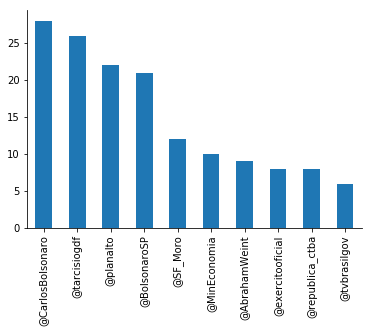

In [17]:
df.mentions.value_counts()[1:11].plot(kind='bar')
sns.despine();

* Hashtags

In [18]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [19]:
def hashtags(col):
    pattern = r'#\w+'
    hashtag = regexp_tokenize(col, pattern)
    return(hashtag)

In [20]:
df['hashtag'] = df.detail.apply(hashtags)

In [21]:
df['hashtag']

0       []
1       []
2       []
3       []
4       []
        ..
1824    []
1825    []
1826    []
1827    []
1828    []
Name: hashtag, Length: 1809, dtype: object

* Emojis

In [22]:
def emojis(col):
    pattern = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
    emoji = regexp_tokenize(col, pattern)
    return(emoji)

In [23]:
df['emojis'] = df.detail.apply(emojis)

In [24]:
df

,id,detail,link,update_date,publish_date,tags,audience,reach,interactions,mentions,hashtag,emojis
0,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447,,[],[]
1,337133609,- Parabéns aos nossos atletas que representara...,https://twitter.com/jairbolsonaro/status/11613...,30/09/2019 09:17:00,13/08/2019 16:47:07,NaN,4856491,165120,65648,,[],[]
2,337329849,"- Por 345 x 76, texto-base da nossa Medida Pr...",https://twitter.com/jairbolsonaro/status/11614...,30/09/2019 09:17:00,13/08/2019 23:49:04,NaN,4872196,165654,67824,,[],[]
3,337343559,Grande dia! :+1:,https://twitter.com/jairbolsonaro/status/11614...,30/09/2019 09:17:00,13/08/2019 23:41:53,NaN,4872196,165654,8614,,[],[]
4,337446779,RT @DamaresAlves: Tiraram dinheiro da construç...,https://twitter.com/jairbolsonaro/status/11615...,30/09/2019 09:17:00,13/08/2019 22:23:25,Bolsonaro,4872196,165654,0,@DamaresAlves,[],[]
5,337546713,- Recepção calorosa em Parnaíba/Piauí. :br:htt...,https://twitter.com/jairbolsonaro/status/11616...,30/09/2019 09:17:00,14/08/2019 11:31:07,NaN,4872196,165654,64296,,[],[]
6,337594081,"- Com o prefeito Mão Santa, de Parnaíba. Obrig...",https://twitter.com/jairbolsonaro/status/11616...,30/09/2019 09:17:00,14/08/2019 14:02:59,NaN,4872196,165654,39952,,[],[]
7,337798915,- Os preços começam a se aproximar dos valores...,https://twitter.com/jairbolsonaro/status/11617...,30/09/2019 09:17:00,14/08/2019 21:39:36,NaN,4872196,165654,39269,,[],[]
8,337798925,- Fernandez-Kirchner tiveram 47% dos votos na ...,https://twitter.com/jairbolsonaro/status/11617...,30/09/2019 09:17:00,14/08/2019 21:39:35,NaN,4872196,165654,63921,,[],[]
9,337818361,- :+1::br:https://twitter.com/tarcisiogdf/stat...,https://twitter.com/jairbolsonaro/status/11618...,30/09/2019 09:17:00,14/08/2019 21:48:24,NaN,4872196,165654,27451,,[],[]


# Retweets

In [25]:
# create column with RT or Tweets from author
df['rt'] = df.detail.str.startswith('RT')

In [26]:
# rename categories from 'rt' column
rt_dict = {False:'tweet', True:'retweet'}
df.rt = df.rt.map(rt_dict)

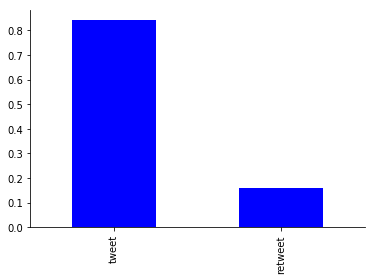

In [27]:
# plot proportion of tweets and rt's
df.rt.value_counts(normalize=True).plot(kind='bar', color='b');
sns.despine()

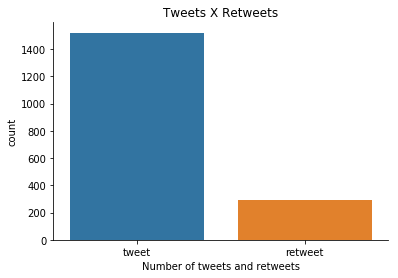

In [28]:
# plot number of tweets and rt's
sns.countplot(df.rt)
plt.title('Tweets X Retweets')
plt.xlabel('Number of tweets and retweets')
sns.despine()

In [29]:
# selecting retweets dataset
retweets = df[df.rt=='retweet']

In [30]:
# identify who Bolsonaro is retweeting
retweets['rt_author'] = sum([re.findall('RT (@\w+)', i) for i in df.detail], [])

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


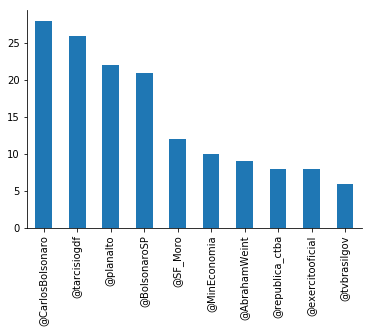

In [31]:
retweets.rt_author.value_counts()[:10].plot(kind='bar')
sns.despine();